In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()   ##checking is there any null values in the dataset.

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No null entries.


In [ ]:
df.drop(['customerID'],axis=1,inplace=True)  ##dropping customer ID column as this is not required for modelling.
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

for col in df.columns:
  print("\n",col,df[col].unique())


 gender ['Female' 'Male']

 SeniorCitizen [0 1]

 Partner ['Yes' 'No']

 Dependents ['No' 'Yes']

 tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService ['No' 'Yes']

 MultipleLines ['No phone service' 'No' 'Yes']

 InternetService ['DSL' 'Fiber optic' 'No']

 OnlineSecurity ['No' 'Yes' 'No internet service']

 OnlineBackup ['Yes' 'No' 'No internet service']

 DeviceProtection ['No' 'Yes' 'No internet service']

 TechSupport ['No' 'Yes' 'No internet service']

 StreamingTV ['No' 'Yes' 'No internet service']

 StreamingMovies ['No' 'Yes' 'No internet service']

 Contract ['Month-to-month' 'One year' 'Two year']

 PaperlessBilling ['Yes' 'No']

 PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

 MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
#df["TotalCharges"]==df["TotalCharges"].astype(float)  ##There are some blank cells in data

In [ ]:
##Blank cells replace by 0
df["TotalCharges"]=df["TotalCharges"].replace(" ",0.0)

In [ ]:
df["TotalCharges"]=df["TotalCharges"].astype(float)
df.info()                      ##Totalcharges converted into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
##check classes are balanced or not:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


Data is imbalanced. there are 1869 observations of churn while 5174 observations of non churn.
We have to balanced data before fitting model.

## EDA

In [ ]:
##checking for outliers in numeric columns:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot outliers
def plot_outliers_hist(col):
    # Boxplots
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

    # Histograms
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color="orange")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

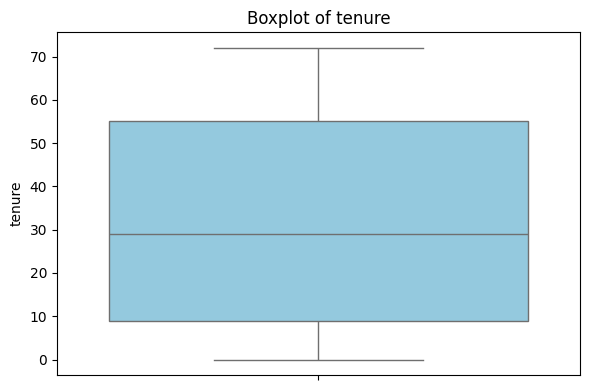

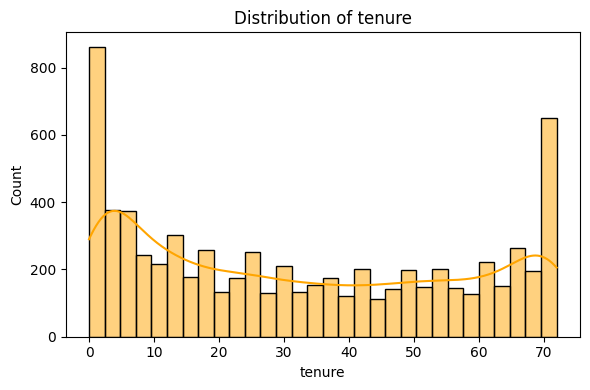

In [ ]:
# Example usage
plot_outliers_hist("tenure")

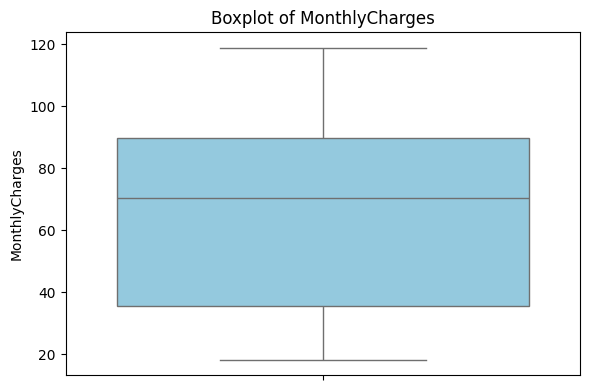

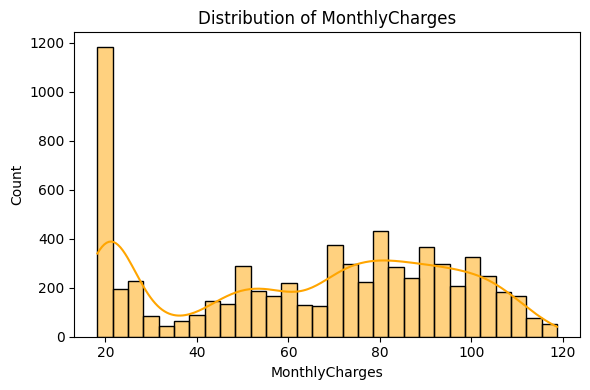

In [ ]:
plot_outliers_hist("MonthlyCharges")

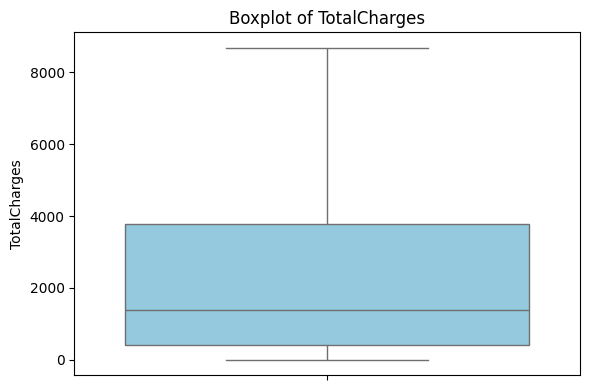

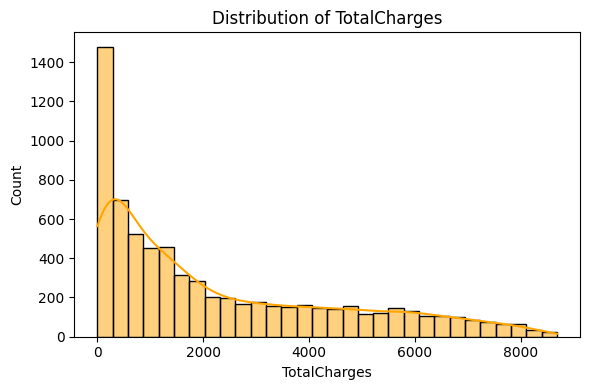

In [ ]:
plot_outliers_hist("TotalCharges")

## correlation and heatmap

In [ ]:
num_col=["tenure","MonthlyCharges","TotalCharges"]

In [ ]:
# Correlation matrix
corr_matrix = df[num_col].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                   tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000


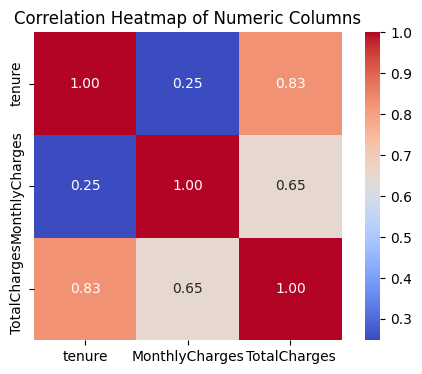

In [ ]:
# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

## Data processing:

In [ ]:
##convert categorical variables into numerical variables.

In [ ]:
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-1732244708.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
##Identifying columns with object data type:
obj_Col=df.select_dtypes(include="object").columns
obj_Col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
encoders={}

#apply label encoding and store the encoders

for col in obj_Col:
  label_encoder=LabelEncoder()
  df[col]=label_encoder.fit_transform(df[col])
  encoders[col]=label_encoder

encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
##Spliting dataset into x and y:

y=df["Churn"]
x=df.drop("Churn",axis=1)

In [ ]:
##splitting data into training and testing:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# synthetic Minority Oversampling Technique(SMOTE)

In [ ]:
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## Model Training

In [ ]:
models={"decision tree":DecisionTreeClassifier(random_state=42),
        "random forest":RandomForestClassifier(random_state=42),
        "xgboost":XGBClassifier(random_state=42)}

In [ ]:
cv_scores={}
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model,x_train_smote,y_train_smote, cv=5 ,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross validation accuracy:{np.mean(scores):.2f}")
  print("-"*50)

Training decision tree with default parameters
decision tree cross validation accuracy:0.78
--------------------------------------------------
Training random forest with default parameters
random forest cross validation accuracy:0.84
--------------------------------------------------
Training xgboost with default parameters
xgboost cross validation accuracy:0.83
--------------------------------------------------


Random Forest gives the highest accuracy compared to other model with default parameters


In [ ]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [ ]:
##evaluate the model:

y_tst_pred=rfc.predict(x_test)

print("Accuracy Score:\n",accuracy_score(y_test,y_tst_pred))
print("-"*50)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_tst_pred))
print("-"*50)
print("Classification Report:\n",classification_report(y_test,y_tst_pred))

Accuracy Score:
 0.772888573456352
--------------------------------------------------
Confusion Matrix:
 [[880 156]
 [164 209]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.57      0.56      0.57       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.77      0.77      1409



Load the saved model and build a predictive model

In [ ]:
data = {
        'gender': ['Female', 'Male', 'Male'],
        'SeniorCitizen': [0, 0, 0],
        'Partner': ['Yes', 'No', 'No'],
        'Dependents': ['No', 'No', 'No'],
        'tenure': [1, 34, 2],
        'PhoneService': ['No', 'Yes', 'Yes'],
        'MultipleLines': ['No phone service', 'No', 'No'],
        'InternetService': ['DSL', 'DSL', 'DSL'],
        'OnlineSecurity': ['No', 'Yes', 'Yes'],
        'OnlineBackup': ['Yes', 'No', 'Yes'],
        'DeviceProtection': ['No', 'Yes', 'No'],
        'TechSupport': ['No', 'No', 'No'],
        'StreamingTV': ['No', 'No', 'No'],
        'StreamingMovies': ['No', 'No', 'No'],
        'Contract': ['Month-to-month', 'One year', 'Month-to-month'],
        'PaperlessBilling': ['Yes', 'No', 'Yes'],
        'PaymentMethod': ['Electronic check', 'Mailed check', 'Mailed check'],
        'MonthlyCharges': [29.85, 56.95, 53.85],
        'TotalCharges': [29.85, 1889.5, 108.15]}

new_df = pd.DataFrame(data)
display(new_df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [ ]:
for column, encoder in encoders.items():
  new_df[column] = encoder.transform(new_df[column])

In [ ]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15


In [ ]:
pred=rfc.predict(new_df)
pred_prob=rfc.predict_proba(new_df)
print(pred)
print(pred_prob)

[0 0 1]
[[0.82 0.18]
 [0.99 0.01]
 [0.17 0.83]]


first value in probability represents probability of target being 0 and second probability of target being 1

In [ ]:
for i in pred:
  if i==1:
    print("Churn")
  else:
    print("No churn")

No churn
No churn
Churn
